## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN** es un algoritmo de densidad, muy popular debido a su efectividad para tareas como identificación de clase en un contexto espacial.

Los algoritmos basados en densidad encuentran regiones de alta densidad que separan los datos y crean clusters asimétricos. Puede encontrar clusters de formar arbitrarias sin verse afectado por el ruido.

La idea detrás del **DBSCAN** es que si un punto en particular pertenece a un grupo, debería estar cerca de muchos otros puntos en ese grupo.


- **DBSCAN** puede encontrar clusters de formas arbitrarias. Incluso puede encontrar un cluster completamente rodeado por un grupo diferente. 

- **DBSCAN** tiene una noción de ruido y es robusto para outliers, aunque depende del dataset.

- **DBSCAN** es muy práctico para muchos problemas porque no requiere de especificar el número de clústeres en **`K-Means`**.



- Por ser un algoritmo de clustering **DBSCAN** no cuenta con un **`built-in method`** para **"predecir"** o **"clasificar"** nuevas instancias, si quisiéramos hacer esto, deberíamos entrenar un modelo de clasificación utilizando como columna objetivo la creada por **DBSCAN**.

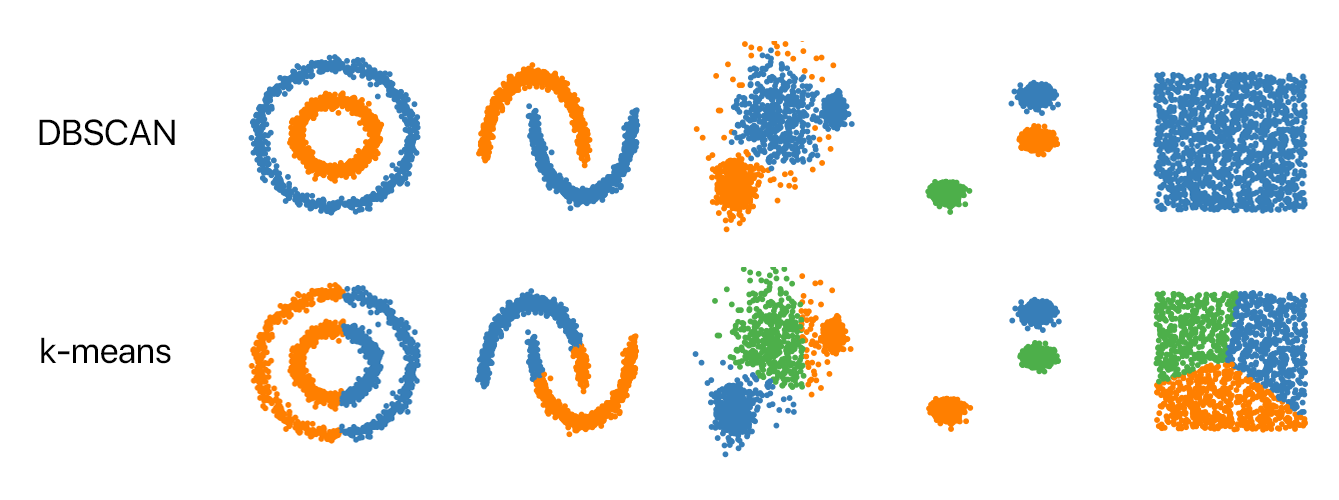

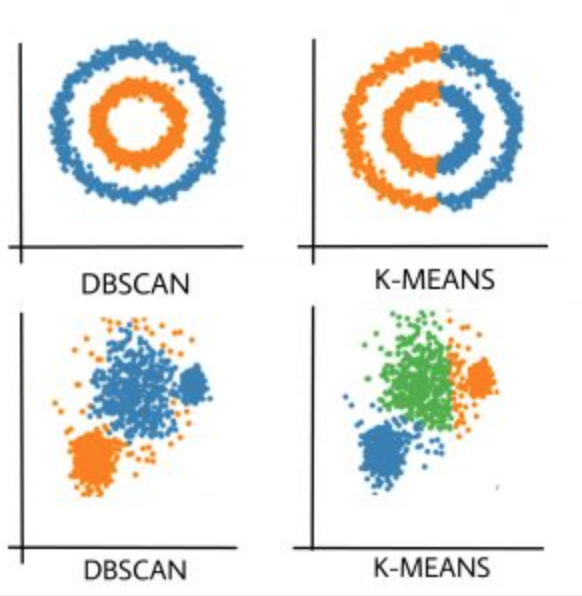

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html_

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import sklearn # Para ver la versión

from sklearn import datasets

# Escalado
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==1.20.3
pandas==1.2.4
matplotlib==3.4.2
seaborn==0.11.1
scikit-learn==1.5.1


In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

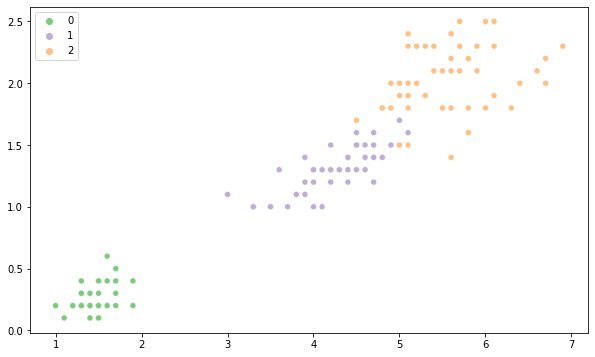

In [4]:
plt.figure(figsize = (10, 6))

# Datos Originales
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = y, palette = "Accent")
plt.show()

In [ ]:
# Escalado de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

### Clustering

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN()

### Etiquetas

In [8]:
# .labels_ nos retorna la "prediccion" del modelo de clustering
# DBSCAN puede etiquetar outliers en caso de que los puntos esten muy alejados de la nube de puntos

dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
Counter(dbscan.labels_)

Counter({0: 150})

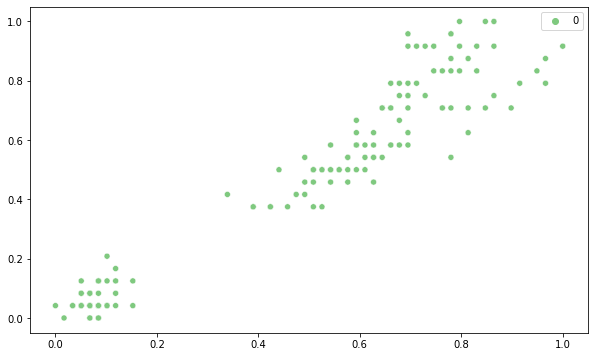

In [10]:
plt.figure(figsize = (10, 6))

# Datos Originales filtrados por DBSCAN
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = dbscan.labels_, palette = "Accent")
plt.show()


# DBSCAN clasificó todos los elementos en el mismo grupo
# Esto es por el parámetro de "eps" que tiene un valor "muy alto".

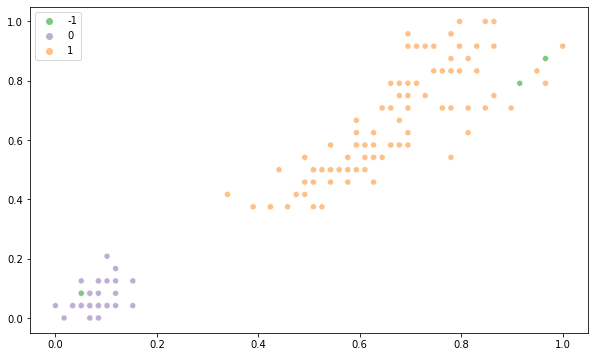

In [21]:
# DBSCAN con eps = 0.2

dbscan = DBSCAN(eps = 0.2)
dbscan.fit(X)

plt.figure(figsize = (10, 6))

# Datos Originales filtrados por DBSCAN
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = dbscan.labels_, palette = "Accent")
plt.show()

# Ahora los clasifico en 2 nubes de puntos y además clasificó algunos puntos como outliers

In [22]:
Counter(dbscan.labels_)

Counter({0: 49, -1: 3, 1: 98})

In [16]:
df_out = pd.concat([pd.DataFrame(X), pd.Series(dbscan.labels_)], axis = 1)
df_out.columns = ["a", "b", "c", "d", "class"]

df_out[df_out["class"] == -1]

,a,b,c,d,class
41,0.055556,0.125,0.050847,0.083333,-1
117,0.944444,0.750,0.966102,0.875000,-1
131,1.000000,0.750,0.915254,0.791667,-1


In [17]:
df_out.sort_values("class")

,a,b,c,d,class
117,0.944444,0.750000,0.966102,0.875000,-1
131,1.000000,0.750000,0.915254,0.791667,-1
41,0.055556,0.125000,0.050847,0.083333,-1
0,0.222222,0.625000,0.067797,0.041667,0
28,0.250000,0.583333,0.067797,0.041667,0
...,...,...,...,...,...
77,0.666667,0.416667,0.677966,0.666667,1
76,0.694444,0.333333,0.644068,0.541667,1
75,0.638889,0.416667,0.576271,0.541667,1
85,0.472222,0.583333,0.593220,0.625000,1


### Parámetros del Modelo (Tuning)

#### Parametros de DBSCAN()

- **`eps`**: float, **default** = 0.5
    - La distancia máxima entre dos muestras para que una se considere en la vecindad de la otra.
    - Este es el parámetro más importante para crear adecuadamente los clusters, depende del conjunto de datos y la función de distancia.
___

- **`min_samples`**: int, **default** = 5
    - El número de elementos (o instancias) en una vecindad para que un punto se considere un punto central. Esto incluye el punto en sí.
    - Por lo general, es común ver que este número es **`2*n_atributos`**.    
___

- **`metric`**: str, **default** = "euclidean"
    - La métrica que se usará al calcular la distancia entre instancias en una matriz de características.
    - "cityblock", "cosine", "euclidean", "l1", "l2", "manhattan".
___

- **`algorithm`**: {"auto", "ball_tree", "kd_tree", "brute"}, **default** = "auto"
    - El algoritmo que usará **`NearestNeighbors`** para calcular distancias puntuales y encontrar vecinos más cercanos.
    - "auto" intentará decidir el algoritmo más apropiado en función de los valores de **`X`**.
___

- **`leaf_size`**: int, **`default`** = 30
    - Tamaño de hoja para **`BallTree`** o **`cKDTree`**.
    - Esto puede afectar la velocidad de construcción, así como la memoria requerida para almacenar el árbol.
    - El valor óptimo depende de la naturaleza del problema.

### Elbow method para DBSCAN


El valor para **`eps`** se puede elegir usando un gráfico de **`k-distance`**, trazando la distancia con **`k = min_samples - 1`** vecinos más cercano. Los "mejores" valores de **`eps`** son donde esta gráfica muestra un "codo".

- Si **`eps`** se elige demasiado pequeño, una gran parte de los datos no se agruparán.
- Mientras que para un valor demasiado alto de **`eps`**, los grupos se fusionarán y la mayoría de los objetos estarán en el mismo grupo.

En general, son preferibles los valores pequeños de **`eps`** y, como regla general, solo una pequeña fracción de puntos debe estar dentro de esta distancia entre sí.

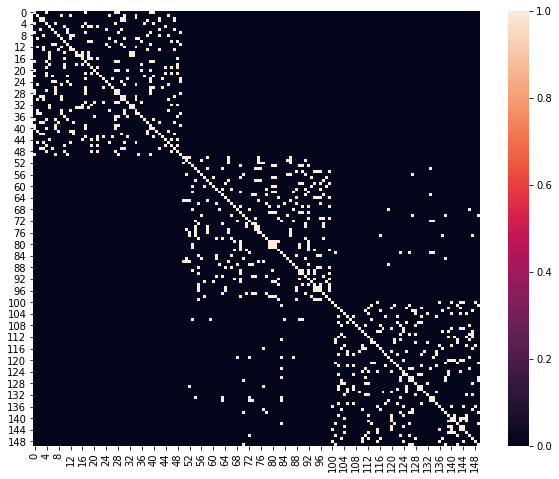

In [26]:
from sklearn.neighbors import NearestNeighbors

# Busca los k vecinos mas cercanos para cada instancia, en este caso k = 2*X.shape[1] - 1
neigh = NearestNeighbors(n_neighbors = 2*X.shape[1] - 1)

# Entrena el modelo
neigh.fit(X)

distances, indices = neigh.kneighbors(X)

# Plot
plt.figure(figsize = (10, 8))

# Grafico de distancias con k-vecinos más cercanos a cada instancia
sns.heatmap(neigh.kneighbors_graph(X).toarray())

plt.show()

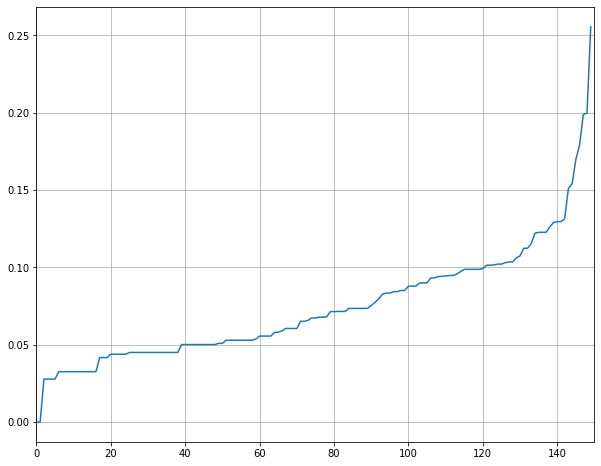

In [27]:
# Plot para encontrar el valor de eps más "optimo"

plt.figure(figsize = (10, 8))

distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.grid()
plt.xlim(0, 150)
plt.show()

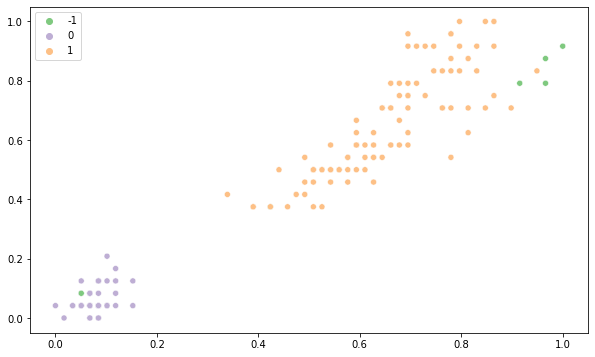

In [28]:
# DBSCAN con eps = 0.20, min_samples = 2*n_atributos

dbscan = DBSCAN(eps = 0.20, min_samples = 2*X.shape[1])
dbscan.fit(X)

plt.figure(figsize = (10, 6))

# Datos Originales filtrados por DBSCAN
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = dbscan.labels_, palette = "Accent")
plt.show()

# Ahora los clasifico en 2 nubes de puntos y además clasificó algunos puntos como outliers

In [29]:
Counter(dbscan.labels_)

Counter({0: 49, -1: 6, 1: 95})

### Silhouette Score

- Es una métrica de evaluación que se utiliza comúnmente para medir la calidad de los clústeres en algoritmos de agrupación.
- Proporciona una medida cuantitativa de cuán similares son los objetos dentro de un mismo clúster en comparación con objetos de otros clústeres.
- Cuanto mayor sea el valor mejor será la calidad de la agrupación.


$$
Silhouette Score = \frac{b(i) - a(i)}{max\left\{a(i),  b(i)\right\}}
$$

**a(i)**: La distancia promedio entre el punto **i** y todos los demás puntos en el mismo clúster. Mide la cohesión, es decir, qué tan cerca están los puntos dentro del mismo clúster.

**b(i)**: La distancia promedio entre el punto **i** y todos los puntos en el clúster más cercano diferente al clúster al que pertenece **i**. Mide la separación, es decir, qué tan lejos están los puntos de otros clústeres.


- Si el valor de **silhouette_score** es cercano a 1, significa que el punto **i** está bien separado de otros clústeres y cercano a los puntos de su propio clúster. Esto indica una buena calidad de agrupación.
- Si el valor de **silhouette_score** es cercano a 0, significa que el punto **i** está cerca del límite entre dos clústeres o que podría estar en un área de solapamiento entre clústeres.
- Si el valor de **silhouette_score** es cercano a -1, significa que el punto **i** podría estar asignado incorrectamente al clúster actual y estaría mejor en otro clúster.

In [31]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette score: {sil_score}")

silhouette score: 0.5235165165522614


### Quiero que probeis varios valores de eps calculando los scoers de silueta para cada uno...

De manera automática con código.

In [35]:
np.linspace(0.1, 0.4, 20)

array([0.1       , 0.11578947, 0.13157895, 0.14736842, 0.16315789,
       0.17894737, 0.19473684, 0.21052632, 0.22631579, 0.24210526,
       0.25789474, 0.27368421, 0.28947368, 0.30526316, 0.32105263,
       0.33684211, 0.35263158, 0.36842105, 0.38421053, 0.4       ])

In [37]:
lista_eps = np.linspace(0.1, 0.4, 20)
sil_scores = []
for eps in lista_eps:
    dbscan = DBSCAN(eps = eps, min_samples = 2*X.shape[1])
    dbscan.fit(X)
    sil_score = silhouette_score(X, dbscan.labels_)
    sil_scores.append(sil_score)

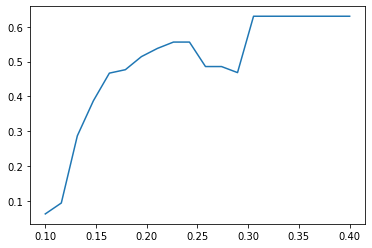

In [38]:
plt.plot(lista_eps, sil_scores)

### Comparación entre K-Means y DBSCAN

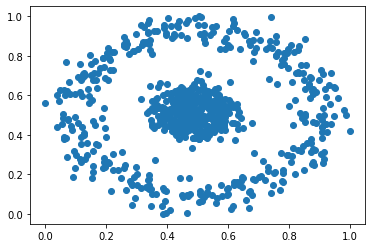

In [39]:
from sklearn.datasets import make_circles


# Creación de datos de ejemplo
X, y = make_circles(n_samples = 750, factor = 0.2, noise = 0.1, random_state = 42)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

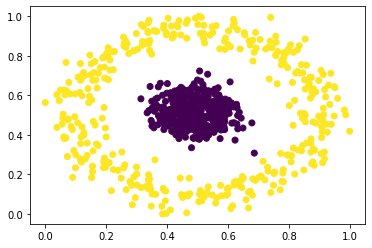

In [41]:
# Usando DBSCAN

dbscan = DBSCAN(eps = 0.10, min_samples = 10)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = dbscan.labels_)
plt.show()

In [42]:
Counter(dbscan.labels_)

Counter({0: 376, 1: 374})

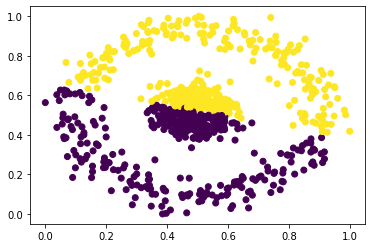

In [46]:
# Usando K-Means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

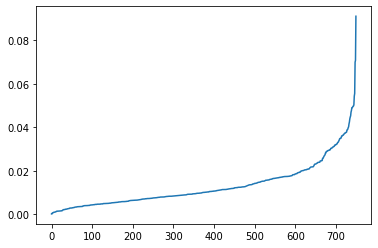

In [47]:
# Metodo del codo para DBSCAN

neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X)

distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.show()

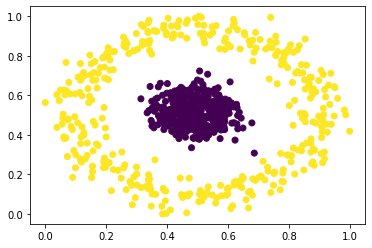

In [51]:
# Usando DBSCAN con eps = 0.03

dbscan = DBSCAN(eps = 0.1, min_samples = 10)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = dbscan.labels_)
plt.show()

In [63]:
lista_eps = np.linspace(0.02, 0.1, 20)
sil_scores = []
for eps in lista_eps:
    dbscan = DBSCAN(eps = eps, min_samples = 10)
    dbscan.fit(X)
    try:
        sil_score = silhouette_score(X, dbscan.labels_)
        sil_scores.append(sil_score)
    except:
        print(f"No se pudo calcular para {eps}")
        sil_scores.append(0)

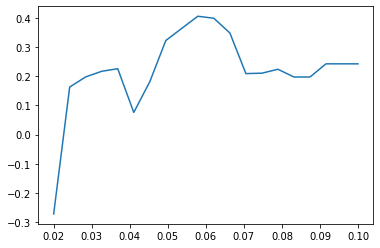

In [64]:
plt.plot(lista_eps, sil_scores)

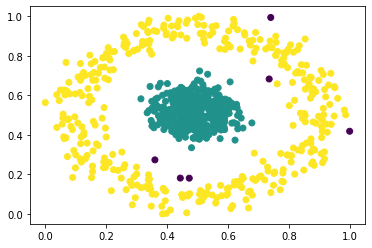

In [65]:
# Usando DBSCAN con eps = 0.03

dbscan = DBSCAN(eps = 0.06, min_samples = 4)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = dbscan.labels_)
plt.show()

In [66]:
Counter(dbscan.labels_)

Counter({0: 375, 1: 369, -1: 6})

In [67]:
sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

silhouette scorre: 0.22831479944682861


In [ ]:
# Usando DBSCAN con eps = 0.07

dbscan = DBSCAN(eps = 0.07, min_samples = 10)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = dbscan.labels_)
plt.show()

In [ ]:
Counter(dbscan.labels_)

In [ ]:
sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

### Ejemplo: Market Segmentation

In [ ]:
df = pd.read_csv("Data/market_segmetation.csv")

df.drop("Id", axis = 1, inplace = True)

df.head(3)

In [ ]:
df.drop_duplicates(inplace = True) 

df.shape

In [ ]:
for col in df.columns:
    sns.histplot(x = df[col])
    plt.show()

In [ ]:
df = df[df["Balance"] < 6000]
df = df[df["CantidadComprasRealizadas"] <= 3000]
df = df[df["CompraMasAltaRealizada"] < 1500]
df = df[df["CompraMasAltaRealizadaPlazos"] < 1500]
df = df[df["LimiteCredito"] < 20000]
df = df[df["Pagos"] < 8000]
df = df[df["PagoMinimo"] < 3000]

df.drop("Anualidad", axis = 1, inplace = True)

df.shape

In [ ]:
X = df.values

X.shape

### Procesamiento

In [ ]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

### Elbow method para DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 2*X.shape[1] - 1)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Plot
plt.figure(figsize = (10, 8))

# Grafico de distancias con k-vecinos más cercanos
sns.heatmap(neigh.kneighbors_graph(X).toarray())

plt.show()

In [ ]:
# Plot para encontrar el valor de eps más "optimo"

plt.figure(figsize = (10, 8))

distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.show()

### Modelo

In [ ]:
dbscan = DBSCAN(eps = 0.20, min_samples = 2*df.shape[1])
dbscan.fit(X)

### Etiquetas

In [ ]:
dbscan.labels_

In [ ]:
Counter(dbscan.labels_)

In [ ]:
sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

In [ ]:
%%time

dbscan_params = list()

for eps in np.arange(0.01, 1.01, 0.01):
    
    for min_samples in (1, 2*X.shape[1] + 1):
        
        for metric in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
            
            # DBSCAN
            dbscan = DBSCAN(eps = eps, min_samples = min_samples, metric = metric)
            dbscan.fit(X)
            
            # Clusters
            n_clusters = len(set(dbscan.labels_))
            
            # Score
            try:
                sil_score = silhouette_score(X = X, labels = dbscan.labels_)
            except:
                sil_score = np.nan
            
            dbscan_params.append([eps, min_samples, metric, sil_score, n_clusters])

In [ ]:
df_score = pd.DataFrame(data    = np.array(dbscan_params),
                        columns = ["eps", "min_samples", "metric", "score", "n_clusters"])

df_score.sort_values(by = ["score", "n_clusters"], ascending = False)

In [ ]:
dbscan = DBSCAN(eps = 0.63, min_samples = 19, metric = "euclidean")
dbscan.fit(X)

In [ ]:
Counter(dbscan.labels_)

In [ ]:
sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

In [ ]:
################################################################################################################################